In [ ]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn                        
import matplotlib.pyplot as plt
import random
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import pandas as pd



In [2]:
# root : Îã§Ïö¥Î∞õÏùÄ root ÎîîÎ†âÌÜ†Î¶¨ ÏÑ§Ï†à
# train : Ìä∏Î†àÏù¥Îãù Îç∞Ïù¥ÌÑ∞Î•º Î∞õÏùÑÍ±¥ÏßÄ, ÏïÑÎãàÎ©¥ TestÎç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Îã§Ïö¥Î∞õÏùå
# transform : ÏßÄÍ∏àÏùÄ Ïù¥ÎØ∏ÏßÄÎ•º ÌÖêÏÑúÎ°úÎßå Î≥ÄÌôòÏ§¨Ïùå, ÎÇòÏ§ëÏóêÎäî Ïù¥ÎØ∏ÏßÄÏùò Ï¢åÏö∞ÏÉÅÌïòÎ≥ÄÌôîÏù¥ÎÇò ÌùëÎ∞±ÌôîÍ∞Ä Í∞ÄÎä•ÌïòÍ≤åÎÅî ÏÑ§Ï†ïÌï† Ïàò ÏûàÏùå. 
cifar10_train = datasets.CIFAR10(root='cifar10_data',
                                 train=True,
                                 download=True,
                                 transform=transforms.Compose([transforms.ToTensor()]))
cifar10_test = datasets.CIFAR10(root='cifar10_data',
                                 train=False,
                                 download=True,
                                 transform=transforms.Compose([transforms.ToTensor()]))

In [3]:
print(cifar10_train)
print(cifar10_test)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10_data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: cifar10_data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [4]:
# Ï≤´ Ïù¥ÎØ∏ÏßÄÏùò Í∞ÅÍ∞ÅÏùò Ï†êÏùò ÏÉâÏÉÅ Ï†ïÎ≥¥
cifar10_train.data[0]


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
# Ï∞∏Í≥† : trainÍ≥º testÎäî ÌÖêÏÑúÌòïÌÉúÏù¥ÏßÄÎßå, Í∑∏ÏïàÏùò dataÎäî ÌÖêÏÑúÌòïÌÉúÍ∞Ä ÏïÑÎãò.
# ÌòÑÏû¨ Ïù¥ÎØ∏ÏßÄÍ∞Ä 50000Í∞ú ÏûàÏùå. Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Îäî 32*32, ÏÉâÏÉÅÏùÄ 3Ïù¥ÎØÄÎ°ú RGBÏª¨Îü¨
cifar10_train.data.shape

(50000, 32, 32, 3)

In [6]:
# targets : ÏÇ¨ÏßÑÏùò Î∂ÑÎ•ò Ï†ïÎ≥¥(6Î≤àÏùÄ Í∞úÍµ¨Î¶¨, 9Î≤àÏùÄ Ìä∏Îü≠)
cifar10_train.targets

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [7]:
# Ïª§ÎÑê Ï∂©Îèå Î∞©ÏßÄÏö© ÏÑ§Ï†ï : ÎùºÏù¥Î∏åÎü¨Î¶¨ Ï∂©Îèå Ïãú Ïª§ÎÑê Ïò§Î•òÍ∞Ä ÎÇòÎäî Í≤ΩÏö∞Í∞Ä ÏûàÏñ¥, ÏïÑÎûò ÏÑ§Ï†ïÏúºÎ°ú Î∞©ÏßÄÌï®.
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Ïù¥ÎØ∏ÏßÄ Î∞∞Ïó¥ Í∑∏Î¶¨Í∏∞ Ìï®Ïàò Ï†ïÏùò
def plot(x,y):
    plt.figure(figsize=(6,4))    # Ï†ÑÏ≤¥ Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞ (ÎÑàÎπÑ, ÎÜíÏù¥)
    for i in range(len(x)):      # len(x) : Ïù¥ÎØ∏ÏßÄ Ï†ÑÏ≤¥ Í∞ØÏàò
        plt.subplot(3,4,i+1)     # 3Ìñâ 4Ïó¥Ïùò ÏÑúÎ∏åÌîåÎ°Ø Ï§ë i+1Î≤àÏß∏ ÏúÑÏπòÏóê Í∑∏Î¶ºÏùÑ Í∑∏Î¶º
        plt.title(y[i])          # Ìï¥Îãπ Ïù¥ÎØ∏ÏßÄÏùò Î†àÏù¥Î∏î(y[i])ÏùÑ Ï†úÎ™©ÏúºÎ°ú ÌëúÏãú
        img=np.array(x[i].reshape(32,32,3)) # Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Î•º (32,32,3) ÌòïÌÉúÎ°ú Î≥ÄÌôò (RGB Ïù¥ÎØ∏ÏßÄ)
        plt.imshow(img, cmap='gray') # Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†• (cmap='gray'Îäî RGB Ïù¥ÎØ∏ÏßÄÏóêÎäî ÌïÑÏöî ÏóÜÏùå)
        plt.axis('off')           # Ï∂ï Ï†úÍ±∞
        plt.tight_layout()           # subplot Í∞ÑÍ≤© Ï°∞Ï†ï
    plt.show()

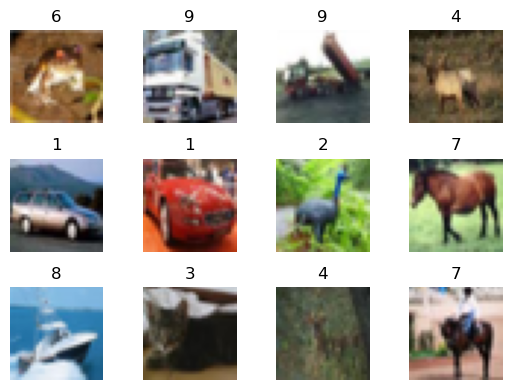

<class 'numpy.ndarray'>
<class 'list'>


In [8]:
plot(cifar10_train.data[:12], cifar10_train.targets[:12])
print(type(cifar10_train.data))   # Î∞∞Ïó¥ÌòïÌÉú Îç∞Ïù¥ÌÑ∞
print(type(cifar10_train.targets))       # Î¶¨Ïä§Ìä∏ÌòïÌÉú Îç∞Ïù¥ÌÑ∞

In [9]:
# Ï≤´ Î≤àÏß∏ Ïù¥ÎØ∏ÏßÄ ÌôïÏù∏
cifar10_train.data[0]

# [Ï§ëÏöî ÏÑ§Î™Ö]
# CIFAR-10Ïùò Í∏∞Î≥∏ Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Îäî (row, col, channel) Íµ¨Ï°∞ ‚Üí (32, 32, 3)
# PyTorchÎäî (channel, row, col) Íµ¨Ï°∞Î•º ÏöîÍµ¨ÌïòÎØÄÎ°ú permute()Î°ú ÏàúÏÑú Î≥ÄÍ≤Ω
# ÎòêÌïú, ÌïôÏäµÏùÑ ÏúÑÌï¥ numpy ‚Üí torch.TensorÎ°ú Î≥ÄÌôò ÌïÑÏöî

# Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò: FloatTensorÎ°ú Î≥ÄÌôò ÌõÑ Ï±ÑÎÑê Ï∞®Ïõê ÏïûÏúºÎ°ú Ïù¥Îèô
cifar10_train.data1 = torch.FloatTensor(cifar10_train.data).permute(0, 3, 1, 2)

# Î†àÏù¥Î∏î Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò: Ï†ïÏàòÌòï ÌÖêÏÑúÎ°ú Î≥ÄÌôò (Î∂ÑÎ•òÏö©)
cifar10_train.targets1 = torch.LongTensor(cifar10_train.targets)

# Î≥ÄÌôòÎêú Ï≤´ Î≤àÏß∏ Ïù¥ÎØ∏ÏßÄ ÌôïÏù∏
cifar10_train.data1[0]

# Îç∞Ïù¥ÌÑ∞ Ï∞®Ïõê ÌôïÏù∏
print(cifar10_train.data1.size())      # ‚Üí torch.Size([N, 3, 32, 32])
print(cifar10_train.targets1.size())   # ‚Üí torch.Size([N])

torch.Size([50000, 3, 32, 32])
torch.Size([50000])


In [10]:
# ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄ Ï†ïÍ∑úÌôî (0~255 ‚Üí 0~1 Î≤îÏúÑÎ°ú Ïä§ÏºÄÏùº Ï°∞Ï†ï)
x1 = cifar10_train.data1.float() / 255

# ÌÉÄÍ≤ü Î†àÏù¥Î∏î
y = cifar10_train.targets1

# Ï†ïÍ∑úÌôîÎêú Ï≤´ Î≤àÏß∏ Ïù¥ÎØ∏ÏßÄ ÌôïÏù∏
print(x1[0])

# Ïù¥ÎØ∏ÏßÄÎ•º 1Ï∞®Ïõê Î≤°ÌÑ∞Î°ú Î≥ÄÌôò (batch, 3072)
# 3*32*32 = 3072 ‚Üí fully-connected layer ÏûÖÎ†•ÏúºÎ°ú ÏÇ¨Ïö©Ìï† Ïàò ÏûàÍ≤å reshape
x = x1.view(x1.size(0), -1)

# Î≤°ÌÑ∞ ÌÅ¨Í∏∞ ÌôïÏù∏
print(x.size())   # ‚Üí torch.Size([N, 3072])

# ÏûÖÎ†• ÌÅ¨Í∏∞: 3Ï±ÑÎÑê Ïù¥ÎØ∏ÏßÄ(32x32)Î•º flattenÌïú Í≤∞Í≥º (3072)
input_size = x.size(-1)

# Ï∂úÎ†• ÌÅ¨Í∏∞: ÌÅ¥ÎûòÏä§ Í∞úÏàò (0~9 ‚Üí 10Í∞ú ÌÅ¥ÎûòÏä§)
output_size = int(max(y)) + 1

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

In [11]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# [1] ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

# numpy Î∞∞Ïó¥ÏùÑ PyTorch TensorÎ°ú Î≥ÄÌôò
# CIFAR-10 ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Îäî (N, H, W, C)Ïù¥ÎØÄÎ°ú ‚Üí (N, C, H, W)Î°ú permute ÌïÑÏöî
cifar10_test.data = torch.FloatTensor(cifar10_test.data).permute(0, 3, 1, 2)

# Î†àÏù¥Î∏îÎèÑ LongTensorÎ°ú Î≥ÄÌôò (Î∂ÑÎ•òÏö© Ï†ïÏàòÌòï Î†àÏù¥Î∏î)
cifar10_test.targets = torch.LongTensor(cifar10_test.targets)

In [12]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# [2] ÌïôÏäµ/Í≤ÄÏ¶ù/ÌÖåÏä§Ìä∏ Î∂ÑÌï† ÏÑ§Ï†ï
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

ratio = [0.8, 0.2]  # ÌïôÏäµ:Í≤ÄÏ¶ù ÎπÑÏú®

# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í∞úÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú Í∞úÏàò Í≥ÑÏÇ∞
train_cnt = int(x.size(0) * ratio[0])   # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ïàò (ex: 50000 * 0.8)
valid_cnt = int(x.size(0) * ratio[1])   # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Ïàò (ex: 50000 * 0.2)
test_cnt = len(cifar10_test.data)      # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ïàò

print(train_cnt, valid_cnt, test_cnt)

cnts = [train_cnt, valid_cnt]  # splitÏö© Í∞úÏàò Î¶¨Ïä§Ìä∏

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# [3] ÌïôÏäµ/Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î¨¥ÏûëÏúÑ Î∂ÑÌï†
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

# Ïù∏Îç±Ïä§ Î¨¥ÏûëÏúÑ ÏÖîÌîå (0~49999 Î≤îÏúÑÏùò Ïù∏Îç±Ïä§ ÎûúÎç§ ÏÑûÍ∏∞)
indices = torch.randperm(x.size(0))
print(indices)

# x, y Îç∞Ïù¥ÌÑ∞Î•º Î¨¥ÏûëÏúÑÎ°ú ÏÑûÏùÄ ÏàúÏÑúÎ°ú Ïû¨Î∞∞Ïó¥
x1 = torch.index_select(x, dim=0, index=indices) 
y1 = torch.index_select(y, dim=0, index=indices) 

# ÌïôÏäµ/Í≤ÄÏ¶ù ÏÑ∏Ìä∏ Î∂ÑÎ¶¨
x2 = list(x1.split(cnts, dim=0))  # ex: [train_x, valid_x]
y2 = list(y1.split(cnts, dim=0))  # ex: [train_y, valid_y]

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# [4] ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞Ä
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

# ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄ Ï†ïÍ∑úÌôî Î∞è flatten (N, C, H, W) ‚Üí (N, 3072)
x2 += [(cifar10_test.data.float() / 255).view(test_cnt, -1)]

# ÌÖåÏä§Ìä∏ Î†àÏù¥Î∏î Ï∂îÍ∞Ä
y2 += [cifar10_test.targets]

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# [5] Ï†ÑÏ≤¥ ÏÑ∏Ìä∏ ÌôïÏù∏ (train, valid, test)
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

# zipÏùÑ ÌÜµÌï¥ x, y ÏßùÏßÄÏñ¥ ÏÇ¨Ïù¥Ï¶à Ï∂úÎ†•
for x_i, y_i in zip(x2, y2):
    print(x_i.size(), y_i.size())

# Ï∞∏Í≥†:
# x2[0], y2[0] ‚Üí ÌïôÏäµ ÏÑ∏Ìä∏
# x2[1], y2[1] ‚Üí Í≤ÄÏ¶ù ÏÑ∏Ìä∏
# x2[2], y2[2] ‚Üí ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏

40000 10000 10000
tensor([40692, 31736, 28832,  ...,  5624, 23947, 47092])
torch.Size([40000, 3072]) torch.Size([40000])
torch.Size([10000, 3072]) torch.Size([10000])
torch.Size([10000, 3072]) torch.Size([10000])


In [13]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# Îã§Ï∏µ ÌçºÏÖâÌä∏Î°† (MLP) Î™®Îç∏ Ï†ïÏùò ‚Äì nn.Sequential Î∞©Ïãù
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

model = nn.Sequential(
    # ÏûÖÎ†•Ï∏µ: input_size(3072) ‚Üí 1000Ï∞®Ïõê
    nn.Linear(input_size, 500),
    nn.LeakyReLU(),  # LeakyReLU ÌôúÏÑ±Ìôî Ìï®Ïàò (ÏùåÏàò ÏûÖÎ†•ÎèÑ ÏïΩÍ∞Ñ ÌÜµÍ≥ºÏãúÌÇ¥)

    # Î∞∞Ïπò Ï†ïÍ∑úÌôî
    nn.BatchNorm1d(500),

    # ÏùÄÎãâÏ∏µ: 500 ‚Üí 400
    nn.Linear(500, 400),
    nn.LeakyReLU(),

    # Î∞∞Ïπò Ï†ïÍ∑úÌôî
    nn.BatchNorm1d(400),

    # ÏùÄÎãâÏ∏µ: 400 ‚Üí 300
    nn.Linear(400, 300),
    nn.LeakyReLU(),

    # Î∞∞Ïπò Ï†ïÍ∑úÌôî
    nn.BatchNorm1d(300),

    # ÏùÄÎãâÏ∏µ: 300 ‚Üí 200
    nn.Linear(300, 200),
    nn.LeakyReLU(),

    # Î∞∞Ïπò Ï†ïÍ∑úÌôî
    nn.BatchNorm1d(200),

    # ÏùÄÎãâÏ∏µ: 200 ‚Üí 100
    nn.Linear(200, 100),
    nn.LeakyReLU(),

    # Î∞∞Ïπò Ï†ïÍ∑úÌôî
    nn.BatchNorm1d(100),

    # Ï∂úÎ†•Ï∏µ: 50 ‚Üí output_size(10)
    nn.Linear(100, output_size)
)

# Î™®Îç∏ Íµ¨Ï°∞ Ï∂úÎ†• (Î™®Îìà Î™©Î°ù ÌòïÌÉúÎ°ú ÌôïÏù∏Îê®)
model

Sequential(
  (0): Linear(in_features=3072, out_features=500, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Linear(in_features=500, out_features=400, bias=True)
  (4): LeakyReLU(negative_slope=0.01)
  (5): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Linear(in_features=400, out_features=300, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): Linear(in_features=300, out_features=200, bias=True)
  (10): LeakyReLU(negative_slope=0.01)
  (11): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): Linear(in_features=200, out_features=100, bias=True)
  (13): LeakyReLU(negative_slope=0.01)
  (14): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (15): Linear(in_features=100, out_features=10, bia

In [14]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# [1] ÏÜêÏã§ Ìï®ÏàòÏôÄ ÏòµÌã∞ÎßàÏù¥Ï†Ä Ï†ïÏùò
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

# CrossEntropyLossÎäî ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú softmax + log + NLLLoss Ìè¨Ìï® ‚Üí Ï∂úÎ†•Ï∏µÏóê softmax ÏÉùÎûµ Í∞ÄÎä•
crit = nn.CrossEntropyLoss()

# Adam ÏòµÌã∞ÎßàÏù¥Ï†Ä: Î™®Îç∏Ïùò ÌïôÏäµ Í∞ÄÎä•Ìïú Î™®Îì† ÌååÎùºÎØ∏ÌÑ∞ ÎåÄÏÉÅ
optimizer = optim.Adam(model.parameters())
# print(list(model.parameters()))

In [15]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# [2] ÌïôÏäµ ÏÑ§Ï†ï
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

epochs = 500            # Ï¥ù ÌïôÏäµ epoch Ïàò
batch_size = 256         # Î∞∞Ïπò ÌÅ¨Í∏∞
from copy import deepcopy

lowest_loss = np.inf     # ÏßÄÍ∏àÍπåÏßÄ Ï∏°Ï†ïÌïú ÏµúÏÜå validation ÏÜêÏã§ Í∞í
lowest_epoch = np.inf    # ÏµúÏÜå ÏÜêÏã§ÏùÑ Í∏∞Î°ùÌïú epoch
early_stop = 20


In [16]:
train_history = []       # epochÎ≥Ñ ÌïôÏäµ ÏÜêÏã§ Í∏∞Î°ùÏö©
valid_history = []       # epochÎ≥Ñ Í≤ÄÏ¶ù ÏÜêÏã§ Í∏∞Î°ùÏö©

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# [3] ÌïôÏäµ Î£®ÌîÑ ÏãúÏûë
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

for epoch in range(epochs):
    # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ ÌïôÏäµ Îã®Í≥Ñ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î•º Î∞∞Ïπò Îã®ÏúÑÎ°ú Î∂ÑÌï†
    x_ = x2[0].split(batch_size, dim=0)
    y_ = y2[0].split(batch_size, dim=0)

    train_loss = 0
    y_hat = []  # (ÏÑ†ÌÉùÏÇ¨Ìï≠) ÏòàÏ∏°Í∞í Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏

    for x_i, y_i in zip(x_, y_):
        # forward: ÏòàÏ∏°Í∞í Í≥ÑÏÇ∞
        y_hat_i = model(x_i)  # shape: (batch_size, num_classes)

        # ÏÜêÏã§ Í≥ÑÏÇ∞ (CrossEntropyLossÎäî Ï†ïÏàòÌòï ÎùºÎ≤® ÏÇ¨Ïö©)
        loss = crit(y_hat_i, y_i.view(-1))  # y_i: (batch_size,)

        # backward: ÌååÎùºÎØ∏ÌÑ∞ ÏóÖÎç∞Ïù¥Ìä∏
        optimizer.zero_grad()   # Í∏∞Ïö∏Í∏∞ Ï¥àÍ∏∞Ìôî
        loss.backward()         # Ïó≠Ï†ÑÌåå
        optimizer.step()        # ÌååÎùºÎØ∏ÌÑ∞ Í∞±Ïã†

        # ÏÜêÏã§ ÎàÑÏ†Å
        train_loss += float(loss)

    # ÌèâÍ∑† ÏÜêÏã§ Í≥ÑÏÇ∞
    train_loss = train_loss / len(x_)   # = epoch ÌèâÍ∑† ÏÜêÏã§

    # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Í≤ÄÏ¶ù Îã®Í≥Ñ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    with torch.no_grad():  # Í∑∏ÎûòÎîîÏñ∏Ìä∏ Í≥ÑÏÇ∞ ÏóÜÏù¥ Ï∂îÎ°†
        x_ = x2[1].split(batch_size, dim=0)
        y_ = y2[1].split(batch_size, dim=0)
        valid_loss = 0

        for x_i, y_i in zip(x_, y_):
            y_hat_i = model(x_i)
            loss = crit(y_hat_i, y_i.view(-1))  # Í≤ÄÏ¶ù ÏÜêÏã§ Í≥ÑÏÇ∞
            valid_loss += float(loss)

            y_hat += [y_hat_i]  # (ÏÑ†ÌÉù) Ï†ÑÏ≤¥ ÏòàÏ∏° Í≤∞Í≥º Ï†ÄÏû•

        # ÌèâÍ∑† Í≤ÄÏ¶ù ÏÜêÏã§ Í≥ÑÏÇ∞
        valid_loss = valid_loss / len(x_)

    # ÏÜêÏã§ Í∏∞Î°ù Ï†ÄÏû•
    train_history += [train_loss]
    valid_history += [valid_loss]

    # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ ÏßÑÌñâ ÏÉÅÌô© Ï∂úÎ†• (10 ÏóêÌè≠ÎßàÎã§) ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    if epoch % 10 == 0:
        print(epoch, train_loss, valid_loss, lowest_loss)

    # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Ï°∞Í∏∞ Ï¢ÖÎ£å(early stopping) Ï≤¥ÌÅ¨ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    if valid_loss <= lowest_loss:
        # ÏµúÏÜå ÏÜêÏã§ Í∞±Ïã† Ïãú: Î™®Îç∏ Ï†ÄÏû•
        lowest_loss = valid_loss
        lowest_epoch = epoch
        best_model = deepcopy(model.state_dict())  # Î™®Îç∏ Í∞ÄÏ§ëÏπò Î≥µÏÇ¨
    else:
        # early_stop Í∞íÏù¥ ÏÑ§Ï†ïÎêú Í≤ΩÏö∞: Ï°∞Í±¥ ÎßåÏ°±ÌïòÎ©¥ ÌïôÏäµ Ï§ëÎã®
        if early_stop > 0 and lowest_epoch + early_stop < epoch:
            print(f'lowest_epoch : {lowest_epoch} Ïù¥ÌõÑ {early_stop} epoch ÎèôÏïà ÏÜêÏã§ Í∞êÏÜå ÏóÜÏùå')
            break

# ÏµúÏ¢Ö Í≤∞Í≥º Ï∂úÎ†•
print(f'epoch : {lowest_epoch}Ïùº Îïå, ÏÜêÏã§Ìï®ÏàòÍ∞Ä {lowest_loss}Î°ú ÏµúÏÜåÍ∞íÏùÑ Í∞ÄÏßê')


0 1.73373530093272 1.597593405842781 inf
10 1.007785177534553 1.4936216741800308 1.4299961805343628
20 0.5808285275462327 2.032737398147583 1.4299961805343628
lowest_epoch : 5 Ïù¥ÌõÑ 20 epoch ÎèôÏïà ÏÜêÏã§ Í∞êÏÜå ÏóÜÏùå
epoch : 5Ïùº Îïå, ÏÜêÏã§Ìï®ÏàòÍ∞Ä 1.4299961805343628Î°ú ÏµúÏÜåÍ∞íÏùÑ Í∞ÄÏßê


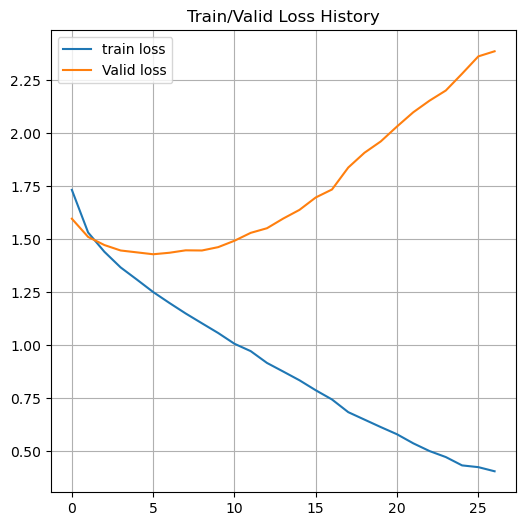

In [17]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# [1] ÌïôÏäµ/Í≤ÄÏ¶ù ÏÜêÏã§ ÏãúÍ∞ÅÌôî
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

plot_from = 0
plt.figure(figsize=(6, 6))          # Ï†ÑÏ≤¥ plot ÌÅ¨Í∏∞ ÏÑ§Ï†ï
plt.grid(True)
plt.title("Train/Valid Loss History")  # Ï†úÎ™© ÏÑ§Ï†ï

# ÌïôÏäµ ÏÜêÏã§ Í∑∏ÎûòÌîÑ
plt.plot(range(plot_from, len(train_history)), train_history[plot_from:], label="train loss")

# Í≤ÄÏ¶ù ÏÜêÏã§ Í∑∏ÎûòÌîÑ
plt.plot(range(plot_from, len(valid_history)), valid_history[plot_from:], label="Valid loss")

plt.legend()
# plt.yscale('log')  # Î°úÍ∑∏ Ïä§ÏºÄÏùºÏù¥ ÌïÑÏöîÌïòÎã§Î©¥ ÌôúÏÑ±Ìôî
plt.show()


In [18]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# [4] ÌÖåÏä§Ìä∏ ÏÜêÏã§ Í≥ÑÏÇ∞ Î∞è Ï†ÑÏ≤¥ ÏòàÏ∏° Í≤∞Í≥º ÏàòÏßë
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

test_loss = 0
y_hat = []  # ÏòàÏ∏° Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏

# ÌèâÍ∞Ä ÏãúÏóêÎäî no_grad()Î°ú Î∂àÌïÑÏöîÌïú gradient Í≥ÑÏÇ∞ Î∞©ÏßÄ
with torch.no_grad():
    # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (x2[-1], y2[-1])Î•º Î∞∞Ïπò Îã®ÏúÑÎ°ú Î∂ÑÌï†
    x_ = x2[-1].split(batch_size, dim=0)
    y_ = y2[-1].split(batch_size, dim=0)

    for x_i, y_i in zip(x_, y_):
        # ÏòàÏ∏°Í∞í Í≥ÑÏÇ∞
        y_hat_i = model(x_i)

        # ÏÜêÏã§ Í≥ÑÏÇ∞ (CrossEntropyLossÎäî Ï†ïÏàòÌòï ÎùºÎ≤® ÏÇ¨Ïö©)
        loss = crit(y_hat_i, y_i.squeeze())

        # Î∞∞ÏπòÎ≥Ñ ÏÜêÏã§ÏùÑ ÎàÑÏ†Å
        test_loss += loss

        # Î∞∞ÏπòÎ≥Ñ ÏòàÏ∏° Í≤∞Í≥º Ï†ÄÏû•
        y_hat += [y_hat_i]

# ÌèâÍ∑† ÌÖåÏä§Ìä∏ ÏÜêÏã§ Í≥ÑÏÇ∞ (Î∞∞Ïπò Í∞úÏàòÎ°ú ÎÇòÎàî)
test_loss = test_loss / len(x_)

# Î∞∞ÏπòÎ≥ÑÎ°ú Ï†ÄÏû•Ìïú ÏòàÏ∏° Í≤∞Í≥ºÎì§ÏùÑ ÌïòÎÇòÏùò ÌÖêÏÑúÎ°ú Ïó∞Í≤∞
y_hat = torch.cat(y_hat, dim=0)

# Í≤∞Í≥º Ï∂úÎ†•
print('üß™ Test Loss:', test_loss)

üß™ Test Loss: tensor(2.3675)


In [19]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# [2] ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

# ÎßàÏßÄÎßâ ÏòàÏ∏° Í≤∞Í≥º y_hatÍ≥º Ïã§Ï†ú Ï†ïÎãµ y2[-1] ÎπÑÍµê
# Ï†ïÎãµÍ≥º ÏòàÏ∏° ÎùºÎ≤®Ïù¥ Í∞ôÏùÄ Í≤ΩÏö∞Ïùò Í∞úÏàò Ïπ¥Ïö¥Ìä∏
correct_cnt = (y2[-1].squeeze() == torch.argmax(y_hat, dim=-1)).sum()

# Ï¥ù ÏÉòÌîå Ïàò
total_count = float(y2[-1].size(0))

# Ï†ïÌôïÎèÑ Ï∂úÎ†•
print('‚úîÔ∏è Test Accuracy :', (correct_cnt / total_count).item())

‚úîÔ∏è Test Accuracy : 0.48350000381469727


In [20]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Ïã§Ï†ú ÎùºÎ≤®Í≥º ÏòàÏ∏° ÎùºÎ≤® Ï∂îÏ∂ú
y_true = y2[-1].cpu().numpy().flatten()
y_pred = torch.argmax(y_hat, dim=1).cpu().numpy().flatten()

# ÌòºÎèô ÌñâÎ†¨ ÏÉùÏÑ±
cm = confusion_matrix(y_true, y_pred)

# pandas DataFrameÏúºÎ°ú Î≥ÄÌôò (ÌÅ¥ÎûòÏä§ Ïù¥Î¶ÑÏùÄ 0~9Î°ú ÏÑ§Ï†ï)
cm_df = pd.DataFrame(cm, 
                     index=[f"True {i}" for i in range(10)],
                     columns=[f"Pred {i}" for i in range(10)])

# ÌòºÎèô ÌñâÎ†¨ Ï∂úÎ†•
print("\nüéØ Confusion Matrix:")
print(cm_df)


üéØ Confusion Matrix:
        Pred 0  Pred 1  Pred 2  Pred 3  Pred 4  Pred 5  Pred 6  Pred 7  \
True 0     556      39      96      30      41      14      28      28   
True 1      79     583      27      22      10      31      14      22   
True 2      64      26     411     114     106      72      85      81   
True 3      33      27      87     346      67     184     122      58   
True 4      55      22     182      80     341      74      91     110   
True 5      22      15      61     234      71     394      83      78   
True 6      18      25      94     118     113      46     526      20   
True 7      58      23      53      73      69      70      35     553   
True 8     116      89      20      23      31      27      15      19   
True 9      66     185      19      37      22      29      12      47   

        Pred 8  Pred 9  
True 0     124      44  
True 1      70     142  
True 2      16      25  
True 3      30      46  
True 4      24      21  
True 5     

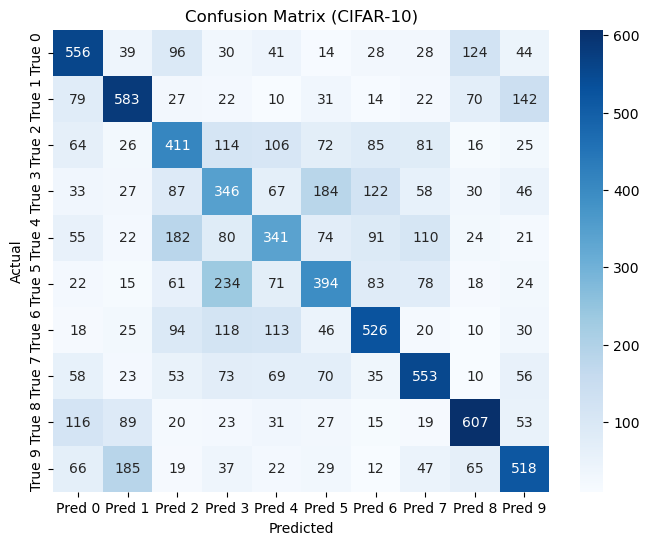

In [21]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (CIFAR-10)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [22]:
# Í≥ºÏ†ÅÌï©ÏùÑ ÎßâÎäî Î∞©Î≤ï
# - Îç∞Ïù¥ÌÑ∞Ïùò ÏñëÏùÑ ÎäòÎ¶¨Í∏∞
# - Î™®Îç∏Ïùò Î≥µÏû°ÎèÑ Ï§ÑÏù¥Í∏∞
# - Í∞ÄÏ§ëÏπò Í∑úÏ†ú(Regularizaion) Ï†ÅÏö©ÌïòÍ∏∞
# - ÎìúÎ°≠ÏïÑÏõÉ(Dropout)